In [1]:
import networkx as nx
from collections import deque

# Define the target configuration for the 8-puzzle
TARGET = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Define the possible moves based on index position
MOVES = {
    0: [1, 3],
    1: [0, 2, 4],
    2: [1, 5],
    3: [0, 4, 6],
    4: [1, 3, 5, 7],
    5: [2, 4, 8],
    6: [3, 7],
    7: [4, 6, 8],
    8: [5, 7]
}

# Function to swap tiles and create a new configuration
def swap(tiles, i, j):
    tiles = list(tiles)
    tiles[i], tiles[j] = tiles[j], tiles[i]
    return tuple(tiles)

# Function to generate neighboring configurations
def get_neighbors(state):
    zero_idx = state.index(0)  # Find the empty tile (0)
    neighbors = []
    for move in MOVES[zero_idx]:
        neighbor = swap(state, zero_idx, move)
        neighbors.append(neighbor)
    return neighbors

# Build the 8-puzzle graph
def build_graph(start_state):
    graph = nx.Graph()
    visited = set()
    queue = deque([start_state])
    
    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)
        graph.add_node(current)
        
        # Get neighbors and add edges
        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                queue.append(neighbor)
            graph.add_edge(current, neighbor)
    
    return graph

# Starting configuration (example)
start_state = (1, 2, 3, 4, 5, 6, 0, 7, 8)  # Change this as needed

# Build and display the graph
graph = build_graph(start_state)
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")


Number of nodes: 181440
Number of edges: 241920


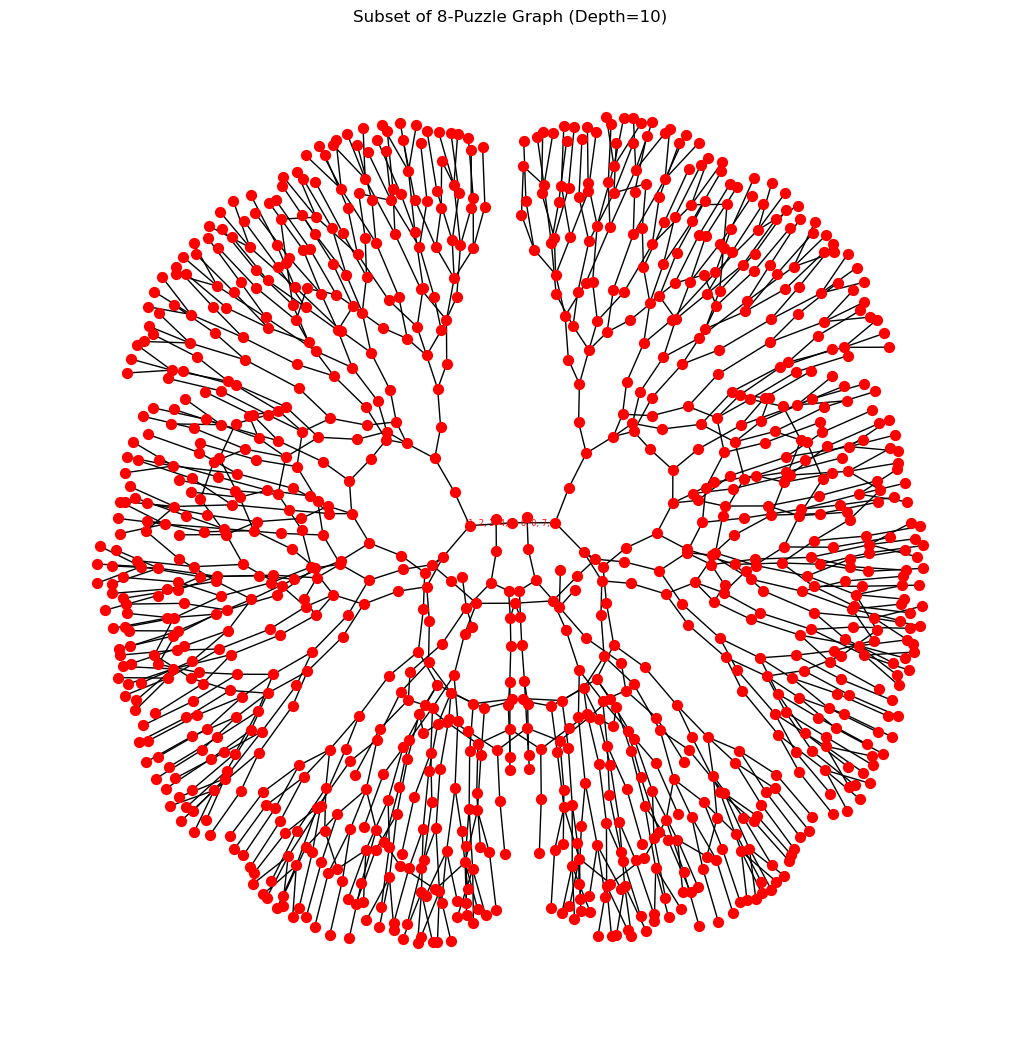

In [3]:

import matplotlib.pyplot as plt


# Build a limited-depth 8-puzzle graph
def build_limited_depth_graph(start_state, max_depth=3):
    graph = nx.Graph()
    visited = set()
    queue = deque([(start_state, 0)])  # Include depth level in the queue
    
    while queue:
        current, depth = queue.popleft()
        if current in visited or depth > max_depth:
            continue
        visited.add(current)
        graph.add_node(current)
        
        # Get neighbors and add edges
        for neighbor in get_neighbors(current):
            if neighbor not in visited and depth < max_depth:
                queue.append((neighbor, depth + 1))
            graph.add_edge(current, neighbor)
    
    return graph

# Starting configuration (example)
start_state = (1, 2, 3, 4, 5, 6, 0, 7, 8)  # Change this as needed

# Build and visualize a small subset of the graph
max_depth = 10
graph = build_limited_depth_graph(start_state, max_depth=max_depth)

# Visualize the graph
plt.figure(figsize=(10, 10))
#pos = nx.shell_layout(graph) # Layout for visualization
# pos = nx.shell_layout(graph)
# pos = nx.spring_layout(graph)
pos=nx.kamada_kawai_layout(graph)

nx.draw(graph, pos, with_labels=False, node_size=50, font_size=8, node_color="red", edge_color="black")
# nx.draw_networkx_labels(graph, pos, labels={n: str(n) for n in graph.nodes()}, font_size=6, font_color="black")
# Draw label only for the start node
nx.draw_networkx_labels(graph, pos, labels={start_state: str(start_state)}, font_size=6, font_color="red")

plt.title(f"Subset of 8-Puzzle Graph (Depth={max_depth})")
plt.show()
